In [6]:
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load the CSV file
data_path = "train.csv"  
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
print(df.head())

# Define the base directory for images
base_image_dir = 'colored_images'  # Replace with the correct path to your image base directory

# Define a mapping from directory names to labels
label_mapping = {
    'No_DR': 0,
    'Mild': 1,
    'Moderate': 2,
    'Severe': 3,
    'Proliferate_DR': 4
}

# Preprocess images and labels
def preprocess_data(df, base_image_dir, label_mapping, img_size=(128, 128)):
    images = []
    labels = []

    for index, row in df.iterrows():
        for label_name, label_num in label_mapping.items():
            img_dir = os.path.join(base_image_dir, label_name)
            img_path = os.path.join(img_dir, row['id_code'] + '.png')
            if os.path.exists(img_path):
                image = cv2.imread(img_path)
                image = cv2.resize(image, img_size)
                image = image / 255.0  # Normalize to [0, 1]
                images.append(image)
                labels.append(label_num)

    images = np.array(images)
    labels = np.array(labels)
    labels = to_categorical(labels, num_classes=5)  # One-hot encode the labels (assuming 5 classes)

    return images, labels

images, labels = preprocess_data(df, base_image_dir, label_mapping)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0
Training data shape: (2929, 128, 128, 3)
Validation data shape: (733, 128, 128, 3)


In [1]:
import tensorflow as tf
print("TensorFlow 버전:", tf.__version__)
print("GPU 사용 가능? :", tf.config.list_physical_devices('GPU'))


TensorFlow 버전: 2.10.0
GPU 사용 가능? : [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))  # Add a dense layer
cnn_model.add(Dense(5, activation='softmax'))  # Output layer with 5 classes (adjust as needed)

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),batch_size=8)

Epoch 1/10
367/367 [==============================] - 3s 6ms/step - loss: 0.8636 - accuracy: 0.6886 - val_loss: 0.7881 - val_accuracy: 0.7312
Epoch 2/10
367/367 [==============================] - 2s 6ms/step - loss: 0.7637 - accuracy: 0.7180 - val_loss: 0.7620 - val_accuracy: 0.7258
Epoch 3/10
367/367 [==============================] - 2s 6ms/step - loss: 0.7485 - accuracy: 0.7187 - val_loss: 0.7559 - val_accuracy: 0.7422
Epoch 4/10
367/367 [==============================] - 2s 6ms/step - loss: 0.7331 - accuracy: 0.7299 - val_loss: 0.7474 - val_accuracy: 0.7326
Epoch 5/10
367/367 [==============================] - 2s 6ms/step - loss: 0.7109 - accuracy: 0.7330 - val_loss: 0.7390 - val_accuracy: 0.7394
Epoch 6/10
367/367 [==============================] - 2s 5ms/step - loss: 0.6884 - accuracy: 0.7436 - val_loss: 0.8609 - val_accuracy: 0.7381
Epoch 7/10
367/367 [==============================] - 2s 6ms/step - loss: 0.6712 - accuracy: 0.7538 - val_loss: 0.7595 - val_accuracy: 0.7353
Epoch 

In [8]:
# Example: Modify learning rate and optimizer
from tensorflow.keras.optimizers import Adam

# Create a new CNN model (you can reuse the existing one)
cnn_model_tuned = Sequential()
cnn_model_tuned.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
cnn_model_tuned.add(MaxPooling2D((2, 2)))
cnn_model_tuned.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_tuned.add(MaxPooling2D((2, 2)))
cnn_model_tuned.add(Flatten())
cnn_model_tuned.add(Dense(128, activation='relu'))  # Add a dense layer
cnn_model_tuned.add(Dense(5, activation='softmax'))  # Output layer with 5 classes (adjust as needed)

# Compile with a different learning rate and optimizer
cnn_model_tuned.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the tuned CNN model
cnn_model_tuned.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),batch_size=8)

🖥️ 사용 가능한 디바이스: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Epoch 1/10
367/367 [==============================] - 3s 7ms/step - loss: 0.8645 - accuracy: 0.6903 - val_loss: 0.7768 - val_accuracy: 0.7299
Epoch 2/10
367/367 [==============================] - 2s 6ms/step - loss: 0.7607 - accuracy: 0.7190 - val_loss: 0.7548 - val_accuracy: 0.7381
Epoch 3/10
367/367 [==============================] - 2s 6ms/step - loss: 0.7491 - accuracy: 0.7187 - val_loss: 0.7618 - val_accuracy: 0.7040
Epoch 4/10
367/367 [==============================] - 2s 6ms/step - loss: 0.7266 - accuracy: 0.7378 - val_loss: 0.7390 - val_accuracy: 0.7408
Epoch 5/10
367/367 [==============================] - 2s 6ms/step - loss: 0.7082 - accuracy: 0.7405 - val_loss: 0.7704 - val_accuracy: 0.7217
Epoch 6/10
367/367 [==============================] - 2s 6ms/step - loss: 0.6833 - accuracy: 0.7453 - val_loss: 0.7541 - val_accuracy: 0.7435

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation settings
datagen = ImageDataGenerator(
    rotation_range=20,  # Random rotation up to 20 degrees
    width_shift_range=0.1,  # Random horizontal shift
    height_shift_range=0.1,  # Random vertical shift
    shear_range=0.2,  # Random shear
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    vertical_flip=False  # No vertical flip for retinal images
)

In [10]:
datagen.fit(X_train)  # X_train: your preprocessed training images
# Example: Train your CNN model using augmented data
cnn_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
92/92 [==============================] - 5s 53ms/step - loss: 0.9952 - accuracy: 0.6473 - val_loss: 0.7682 - val_accuracy: 0.7422
Epoch 2/10
92/92 [==============================] - 5s 52ms/step - loss: 0.8477 - accuracy: 0.6996 - val_loss: 0.8195 - val_accuracy: 0.7381
Epoch 3/10
92/92 [==============================] - 5s 50ms/step - loss: 0.8010 - accuracy: 0.7122 - val_loss: 0.7678 - val_accuracy: 0.7422
Epoch 4/10
92/92 [==============================] - 5s 55ms/step - loss: 0.7938 - accuracy: 0.7194 - val_loss: 0.7769 - val_accuracy: 0.7408
Epoch 5/10
92/92 [==============================] - 5s 52ms/step - loss: 0.7918 - accuracy: 0.7163 - val_loss: 0.7873 - val_accuracy: 0.7353
Epoch 6/10
92/92 [==============================] - 5s 50ms/step - loss: 0.7567 - accuracy: 0.7272 - val_loss: 0.7647 - val_accuracy: 0.7476
Epoch 7/10
92/92 [==============================] - 5s 51ms/step - loss: 0.7583 - accuracy: 0.7286 - val_loss: 0.7585 - val_accuracy: 0.7394
Epoch 8/10
92

In [16]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load pre-trained VGG16 model (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Extract features from your images using VGG16
features_train = base_model.predict(X_train, batch_size=4)
features_val = base_model.predict(X_val, batch_size=4)

# Create an ANN model on top of VGG16 features
ann_on_vgg = Sequential()
ann_on_vgg.add(Flatten(input_shape=features_train.shape[1:]))
ann_on_vgg.add(Dense(128, activation='relu'))
ann_on_vgg.add(Dense(5, activation='softmax'))  # Assuming 5 classes

# Compile the model
ann_on_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
ann_on_vgg.fit(features_train, y_train, epochs=10, validation_data=(features_val, y_val), batch_size=4)

184/184 [==============================] - 1s 5ms/step
Epoch 1/10
733/733 [==============================] - 1s 2ms/step - loss: 0.8933 - accuracy: 0.6920 - val_loss: 0.7926 - val_accuracy: 0.7162
Epoch 2/10
733/733 [==============================] - 1s 2ms/step - loss: 0.7405 - accuracy: 0.7320 - val_loss: 0.8298 - val_accuracy: 0.7340
Epoch 3/10
733/733 [==============================] - 1s 2ms/step - loss: 0.7144 - accuracy: 0.7344 - val_loss: 0.7196 - val_accuracy: 0.7422
Epoch 4/10
733/733 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.7354 - val_loss: 0.7105 - val_accuracy: 0.7353
Epoch 5/10
733/733 [==============================] - 1s 2ms/step - loss: 0.6733 - accuracy: 0.7511 - val_loss: 0.7621 - val_accuracy: 0.7381
Epoch 6/10
733/733 [==============================] - 1s 2ms/step - loss: 0.6482 - accuracy: 0.7627 - val_loss: 0.7289 - val_accuracy: 0.7435
Epoch 7/10
733/733 [==============================] - 1s 2ms/step - loss: 0.6375 - accuracy: 

In [17]:
# Create the ANN model
ann_model = Sequential()
ann_model.add(Dense(128, activation='relu', input_shape=(cnn_model.output_shape[1],)))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(5, activation='softmax'))  # Assuming 5 classes

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the ANN model using CNN features
ann_model.fit(cnn_model.predict(X_train), y_train, epochs=10, validation_data=(cnn_model.predict(X_val), y_val))

23/23 [==============================] - 0s 5ms/step
Epoch 1/10
92/92 [==============================] - 1s 3ms/step - loss: 0.9964 - accuracy: 0.6910 - val_loss: 0.7651 - val_accuracy: 0.7422
Epoch 2/10
92/92 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.7518 - val_loss: 0.7447 - val_accuracy: 0.7435
Epoch 3/10
92/92 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.7610 - val_loss: 0.7386 - val_accuracy: 0.7476
Epoch 4/10
92/92 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.7719 - val_loss: 0.7440 - val_accuracy: 0.7476
Epoch 5/10
92/92 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.7695 - val_loss: 0.7389 - val_accuracy: 0.7490
Epoch 6/10
92/92 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.7794 - val_loss: 0.7366 - val_accuracy: 0.7490
Epoch 7/10
92/92 [==============================] - 0s 2ms/step - loss: 0.6436 - accuracy: 0.7750 - val_los

23/23 [==============================] - 0s 711us/step


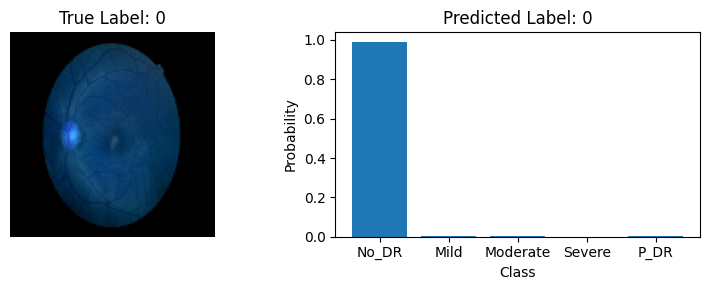

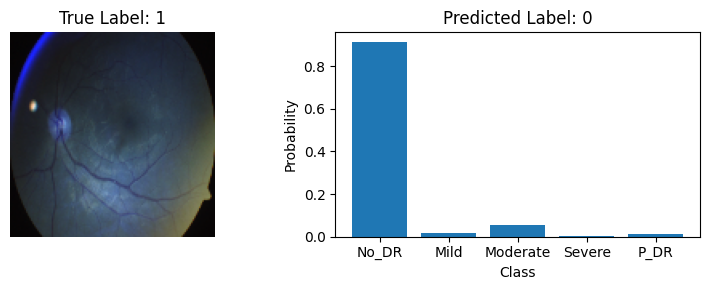

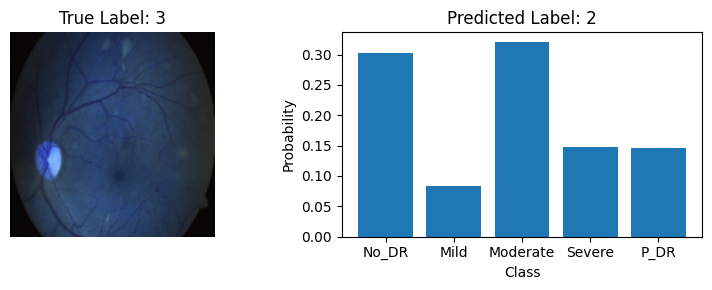

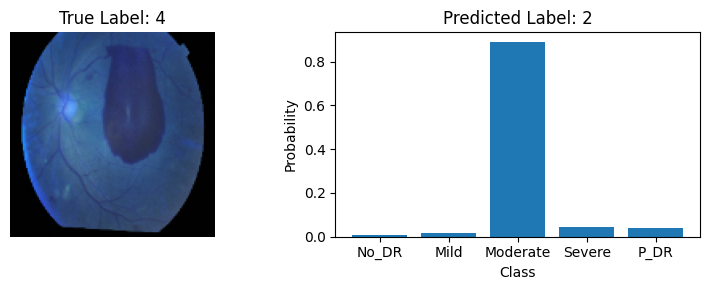

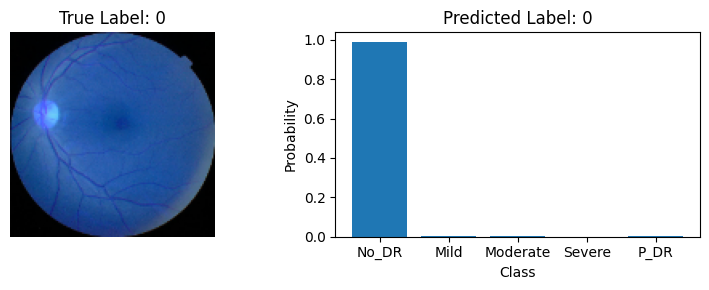

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a trained model (cnn_model and ann_model) already

# Get predictions for test data
cnn_predictions = cnn_model.predict(X_val)
ann_predictions = ann_model.predict(cnn_predictions)

# Convert one-hot encoded labels back to class labels
predicted_classes = np.argmax(ann_predictions, axis=1)

# Visualize a few test images along with their predicted labels
num_samples_to_visualize = 5
for i in range(num_samples_to_visualize):
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(X_val[i])
    plt.title(f"True Label: {np.argmax(y_val[i])}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.bar(range(5), ann_predictions[i])
    plt.xticks(range(5), ['No_DR', 'Mild', 'Moderate', 'Severe', 'P_DR'])
    plt.title(f"Predicted Label: {predicted_classes[i]}")
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.tight_layout()

    plt.show()

In [3]:
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [7]:
data_path='train.csv'
df=pd.read_csv(data_path)

base_image_dir='colored_images'

label_mapping={
    'No_DR':0,
    'Mild':1,
    'Moderate':2,
    'Severe':3,
    'Proliferate_DR':4
}

def preprocess_data(df,base_image_dir,label_mapping,img_size=(128,128)):
    images=[]
    labels=[]

    for index, row in df.iterrows():
        for label_name, label_num in label_mapping.items():
            img_dir=os.path.join(base_image_dir,label_name)
            img_path=os.path.join(img_dir,row['id_code']+'.png')
            if os.path.exists(img_path):
                image=cv2.imread(img_path)
                image=cv2.resize(image,img_size)
                image=image/255.0
                images.append(image)
                labels.append(label_num)

    images=np.array(images)
    labels=np.array(labels)
    labels=to_categorical(labels,num_classes=5)

    return images, labels

images, labels = preprocess_data(df,base_image_dir,label_mapping)

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")


Training data shape: (2929, 128, 128, 3)
Validation data shape: (733, 128, 128, 3)


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

cnn_model=Sequential()
cnn_model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Conv2D(64,(3,3),activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(128,activation='relu'))
cnn_model.add(Dense(5,activation='softmax'))

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
92/92 [==============================] - 12s 32ms/step - loss: 1.1248 - accuracy: 0.6845 - val_loss: 0.8658 - val_accuracy: 0.7067
Epoch 2/10
92/92 [==============================] - 2s 25ms/step - loss: 0.7523 - accuracy: 0.7214 - val_loss: 0.7608 - val_accuracy: 0.7149
Epoch 3/10
92/92 [==============================] - 2s 25ms/step - loss: 0.7348 - accuracy: 0.7282 - val_loss: 0.7469 - val_accuracy: 0.7394
Epoch 4/10
92/92 [==============================] - 2s 25ms/step - loss: 0.7226 - accuracy: 0.7296 - val_loss: 0.7590 - val_accuracy: 0.7299
Epoch 5/10
92/92 [==============================] - 2s 25ms/step - loss: 0.7188 - accuracy: 0.7351 - val_loss: 1.0850 - val_accuracy: 0.6985
Epoch 6/10
92/92 [==============================] - 2s 25ms/step - loss: 0.6897 - accuracy: 0.7385 - val_loss: 0.7614 - val_accuracy: 0.7422
Epoch 7/10
92/92 [==============================] - 2s 27ms/step - loss: 0.6698 - accuracy: 0.7504 - val_loss: 0.7334 - val_accuracy: 0.7381
Epoch 8/10
9

In [9]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D((2,2)))  # 추가
cnn_model.add(Conv2D(128, (3,3), activation='relu'))  # 추가
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))  # 뉴런↑
cnn_model.add(Dense(5, activation='softmax'))

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
92/92 [==============================] - 4s 30ms/step - loss: 0.9801 - accuracy: 0.6634 - val_loss: 0.8138 - val_accuracy: 0.7121
Epoch 2/10
92/92 [==============================] - 3s 27ms/step - loss: 0.7609 - accuracy: 0.7241 - val_loss: 0.7821 - val_accuracy: 0.7271
Epoch 3/10
92/92 [==============================] - 2s 27ms/step - loss: 0.7472 - accuracy: 0.7279 - val_loss: 0.7868 - val_accuracy: 0.7422
Epoch 4/10
92/92 [==============================] - 3s 27ms/step - loss: 0.7201 - accuracy: 0.7398 - val_loss: 0.7457 - val_accuracy: 0.7312
Epoch 5/10
92/92 [==============================] - 3s 27ms/step - loss: 0.6744 - accuracy: 0.7542 - val_loss: 0.7367 - val_accuracy: 0.7503
Epoch 6/10
92/92 [==============================] - 2s 27ms/step - loss: 0.6442 - accuracy: 0.7569 - val_loss: 0.7744 - val_accuracy: 0.7381
Epoch 7/10
92/92 [==============================] - 2s 27ms/step - loss: 0.5789 - accuracy: 0.7839 - val_loss: 0.7831 - val_accuracy: 0.7244
Epoch 8/10
92

In [10]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D((2,2)))  # 추가
cnn_model.add(Conv2D(128, (3,3), activation='relu'))  # 추가
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))  # 뉴런↑
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(5, activation='softmax'))

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
92/92 [==============================] - 3s 29ms/step - loss: 0.9466 - accuracy: 0.6627 - val_loss: 0.8410 - val_accuracy: 0.7258
Epoch 2/10
92/92 [==============================] - 2s 25ms/step - loss: 0.7876 - accuracy: 0.7187 - val_loss: 0.7678 - val_accuracy: 0.7422
Epoch 3/10
92/92 [==============================] - 2s 26ms/step - loss: 0.7913 - accuracy: 0.7132 - val_loss: 0.7590 - val_accuracy: 0.7326
Epoch 4/10
92/92 [==============================] - 2s 26ms/step - loss: 0.7581 - accuracy: 0.7327 - val_loss: 0.7595 - val_accuracy: 0.7326
Epoch 5/10
92/92 [==============================] - 2s 25ms/step - loss: 0.7390 - accuracy: 0.7357 - val_loss: 0.7444 - val_accuracy: 0.7244
Epoch 6/10
92/92 [==============================] - 2s 25ms/step - loss: 0.7149 - accuracy: 0.7375 - val_loss: 0.7432 - val_accuracy: 0.7312
Epoch 7/10
92/92 [==============================] - 2s 25ms/step - loss: 0.7000 - accuracy: 0.7487 - val_loss: 0.7392 - val_accuracy: 0.7326
Epoch 8/10
92

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(X_train)
cnn_model.fit(datagen.flow(X_train,y_train,batch_size=32),epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
92/92 [==============================] - 11s 109ms/step - loss: 0.9914 - accuracy: 0.6497 - val_loss: 0.8203 - val_accuracy: 0.7271
Epoch 2/10
92/92 [==============================] - 9s 94ms/step - loss: 0.8728 - accuracy: 0.6944 - val_loss: 0.7986 - val_accuracy: 0.7217
Epoch 3/10
92/92 [==============================] - 9s 99ms/step - loss: 0.8322 - accuracy: 0.7064 - val_loss: 0.8042 - val_accuracy: 0.7285
Epoch 4/10
92/92 [==============================] - 8s 90ms/step - loss: 0.8191 - accuracy: 0.7129 - val_loss: 0.7748 - val_accuracy: 0.7299
Epoch 5/10
92/92 [==============================] - 9s 95ms/step - loss: 0.8115 - accuracy: 0.7139 - val_loss: 0.7795 - val_accuracy: 0.7353
Epoch 6/10
92/92 [==============================] - 8s 84ms/step - loss: 0.8001 - accuracy: 0.7136 - val_loss: 0.7740 - val_accuracy: 0.7367
Epoch 7/10
92/92 [==============================] - 8s 84ms/step - loss: 0.7701 - accuracy: 0.7248 - val_loss: 0.7590 - val_accuracy: 0.7449
Epoch 8/10


In [15]:
datagen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(X_train)

cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.5))  # 오버피팅 방지
cnn_model.add(Dense(5, activation='softmax'))

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,  # 증가 가능
    validation_data=(X_val, y_val)
)

Epoch 1/10
92/92 [==============================] - 10s 103ms/step - loss: 1.0777 - accuracy: 0.6009 - val_loss: 0.8218 - val_accuracy: 0.7244
Epoch 2/10
92/92 [==============================] - 9s 97ms/step - loss: 0.8993 - accuracy: 0.6958 - val_loss: 0.8314 - val_accuracy: 0.7244
Epoch 3/10
92/92 [==============================] - 8s 87ms/step - loss: 0.8609 - accuracy: 0.6972 - val_loss: 0.8657 - val_accuracy: 0.7244
Epoch 4/10
92/92 [==============================] - 8s 85ms/step - loss: 0.8516 - accuracy: 0.7095 - val_loss: 0.8614 - val_accuracy: 0.7217
Epoch 5/10
92/92 [==============================] - 9s 94ms/step - loss: 0.8445 - accuracy: 0.7078 - val_loss: 0.8230 - val_accuracy: 0.7353
Epoch 6/10
92/92 [==============================] - 9s 100ms/step - loss: 0.8244 - accuracy: 0.7125 - val_loss: 0.8199 - val_accuracy: 0.7217
Epoch 7/10
92/92 [==============================] - 8s 88ms/step - loss: 0.8261 - accuracy: 0.7132 - val_loss: 0.8121 - val_accuracy: 0.7353
Epoch 8/10

In [16]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

base_model=VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))

features_train=base_model.predict(X_train)
features_val=base_model.predict(X_val)

ann_on_vgg=Sequential()
ann_on_vgg.add(Flatten(input_shape=features_train.shape[1:]))
ann_on_vgg.add(Dense(128,activation='relu'))
ann_on_vgg.add(Dense(5,activation='softmax'))

ann_on_vgg.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

ann_on_vgg.fit(features_train,y_train,epochs=10,validation_data=(features_val,y_val))

23/23 [==============================] - 2s 107ms/step
Epoch 1/10
92/92 [==============================] - 1s 7ms/step - loss: 0.9312 - accuracy: 0.6873 - val_loss: 0.8197 - val_accuracy: 0.7285
Epoch 2/10
92/92 [==============================] - 0s 4ms/step - loss: 0.7503 - accuracy: 0.7296 - val_loss: 0.7746 - val_accuracy: 0.7244
Epoch 3/10
92/92 [==============================] - 0s 4ms/step - loss: 0.7014 - accuracy: 0.7405 - val_loss: 0.7517 - val_accuracy: 0.7394
Epoch 4/10
92/92 [==============================] - 0s 4ms/step - loss: 0.6661 - accuracy: 0.7532 - val_loss: 0.7500 - val_accuracy: 0.7203
Epoch 5/10
92/92 [==============================] - 0s 3ms/step - loss: 0.6552 - accuracy: 0.7600 - val_loss: 0.7091 - val_accuracy: 0.7408
Epoch 6/10
92/92 [==============================] - 0s 3ms/step - loss: 0.6160 - accuracy: 0.7747 - val_loss: 0.6938 - val_accuracy: 0.7435
Epoch 7/10
92/92 [==============================] - 0s 4ms/step - loss: 0.6106 - accuracy: 0.7767 - val_l

In [21]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

base_model=VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))

features_train=base_model.predict(X_train)
features_val=base_model.predict(X_val)

ann_on_vgg=Sequential()
ann_on_vgg.add(Flatten(input_shape=features_train.shape[1:]))
ann_on_vgg.add(Dense(128,activation='relu'))
ann_on_vgg.add(Dense(5,activation='softmax'))

ann_on_vgg.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

ann_on_vgg.fit(features_train,y_train,epochs=50,validation_data=(features_val,y_val))

23/23 [==============================] - 1s 32ms/step
Epoch 1/50
92/92 [==============================] - 1s 6ms/step - loss: 0.9076 - accuracy: 0.6692 - val_loss: 0.8108 - val_accuracy: 0.7190
Epoch 2/50
92/92 [==============================] - 0s 3ms/step - loss: 0.7357 - accuracy: 0.7330 - val_loss: 0.7501 - val_accuracy: 0.7285
Epoch 3/50
92/92 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.7480 - val_loss: 0.7334 - val_accuracy: 0.7408
Epoch 4/50
92/92 [==============================] - 0s 3ms/step - loss: 0.6684 - accuracy: 0.7555 - val_loss: 0.7392 - val_accuracy: 0.7353
Epoch 5/50
92/92 [==============================] - 0s 3ms/step - loss: 0.6415 - accuracy: 0.7607 - val_loss: 0.6907 - val_accuracy: 0.7544
Epoch 6/50
92/92 [==============================] - 0s 3ms/step - loss: 0.6320 - accuracy: 0.7654 - val_loss: 0.7097 - val_accuracy: 0.7462
Epoch 7/50
92/92 [==============================] - 0s 3ms/step - loss: 0.5903 - accuracy: 0.7771 - val_lo

In [17]:
# Create the ANN model
ann_model = Sequential()
ann_model.add(Dense(128, activation='relu', input_shape=(cnn_model.output_shape[1],)))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(5, activation='softmax'))  # Assuming 5 classes

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the ANN model using CNN features
ann_model.fit(cnn_model.predict(X_train), y_train, epochs=10, validation_data=(cnn_model.predict(X_val), y_val))

23/23 [==============================] - 0s 6ms/step
Epoch 1/10
92/92 [==============================] - 1s 6ms/step - loss: 1.0191 - accuracy: 0.6866 - val_loss: 0.8096 - val_accuracy: 0.7340
Epoch 2/10
92/92 [==============================] - 0s 3ms/step - loss: 0.8052 - accuracy: 0.7190 - val_loss: 0.7982 - val_accuracy: 0.7312
Epoch 3/10
92/92 [==============================] - 0s 3ms/step - loss: 0.7962 - accuracy: 0.7173 - val_loss: 0.8009 - val_accuracy: 0.7312
Epoch 4/10
92/92 [==============================] - 0s 4ms/step - loss: 0.7907 - accuracy: 0.7194 - val_loss: 0.7849 - val_accuracy: 0.7312
Epoch 5/10
92/92 [==============================] - 0s 3ms/step - loss: 0.7906 - accuracy: 0.7204 - val_loss: 0.7813 - val_accuracy: 0.7326
Epoch 6/10
92/92 [==============================] - 0s 3ms/step - loss: 0.7895 - accuracy: 0.7187 - val_loss: 0.7812 - val_accuracy: 0.7326
Epoch 7/10
92/92 [==============================] - 0s 3ms/step - loss: 0.7830 - accuracy: 0.7211 - val_los

In [19]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = True
for layer in base_model.layers[:-4]:  # 뒤에서 4개만 훈련
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
92/92 [==============================] - 11s 108ms/step - loss: 1.2414 - accuracy: 0.5726 - val_loss: 1.0461 - val_accuracy: 0.6971
Epoch 2/10
92/92 [==============================] - 10s 103ms/step - loss: 0.9951 - accuracy: 0.6548 - val_loss: 0.9812 - val_accuracy: 0.6808
Epoch 3/10
92/92 [==============================] - 9s 97ms/step - loss: 0.9009 - accuracy: 0.6910 - val_loss: 0.8891 - val_accuracy: 0.6930
Epoch 4/10
92/92 [==============================] - 9s 97ms/step - loss: 0.8685 - accuracy: 0.6951 - val_loss: 0.9192 - val_accuracy: 0.6821
Epoch 5/10
92/92 [==============================] - 7s 78ms/step - loss: 0.8469 - accuracy: 0.7030 - val_loss: 0.7819 - val_accuracy: 0.7258
Epoch 6/10
92/92 [==============================] - 9s 97ms/step - loss: 0.8492 - accuracy: 0.6975 - val_loss: 0.7908 - val_accuracy: 0.7217
Epoch 7/10
92/92 [==============================] - 9s 95ms/step - loss: 0.8237 - accuracy: 0.7081 - val_loss: 0.8741 - val_accuracy: 0.7190
Epoch 8/1

23/23 [==============================] - 0s 2ms/step


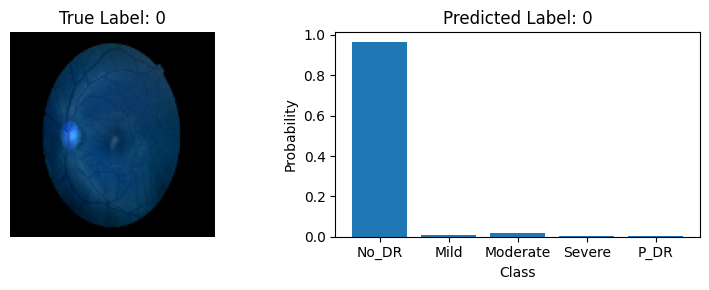

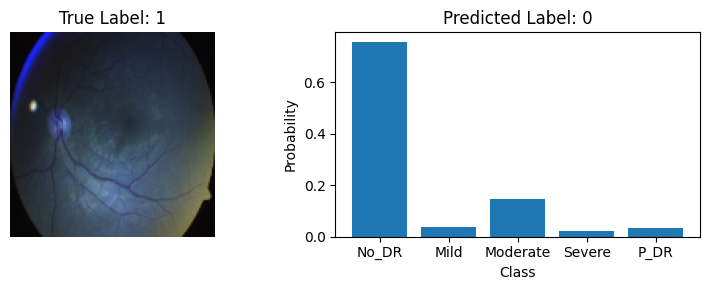

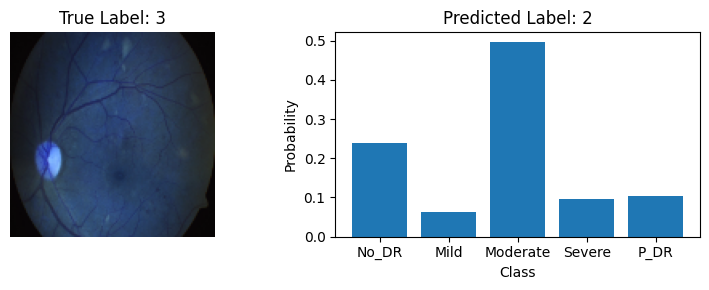

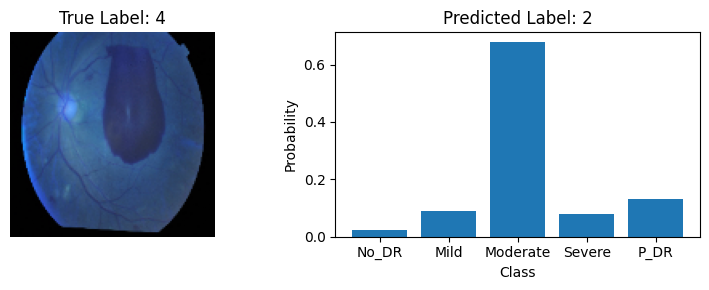

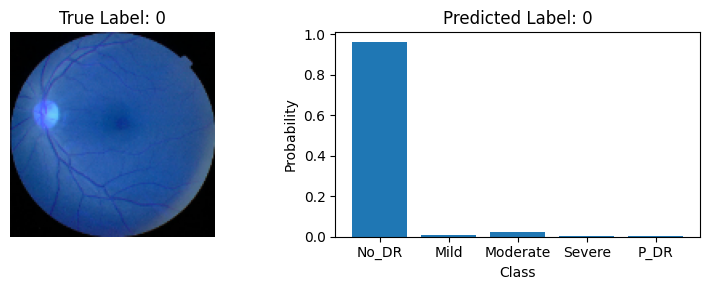

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a trained model (cnn_model and ann_model) already

# Get predictions for test data
cnn_predictions = cnn_model.predict(X_val)
ann_predictions = ann_model.predict(cnn_predictions)

# Convert one-hot encoded labels back to class labels
predicted_classes = np.argmax(ann_predictions, axis=1)

# Visualize a few test images along with their predicted labels
num_samples_to_visualize = 5
for i in range(num_samples_to_visualize):
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(X_val[i])
    plt.title(f"True Label: {np.argmax(y_val[i])}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.bar(range(5), ann_predictions[i])
    plt.xticks(range(5), ['No_DR', 'Mild', 'Moderate', 'Severe', 'P_DR'])
    plt.title(f"Predicted Label: {predicted_classes[i]}")
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.tight_layout()

    plt.show()